In [708]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [724]:
# Reading csv files
women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('athletes-men.csv')

# CSV with only US athletes
men_us = pd.read_csv('us_men.csv')
no_us = pd.read_csv('other_men.csv')
no_us_women = pd.read_csv('other_women.csv')
no_us_women

,Name,rank,region,longitude,latitude,age,height,weight,run400,run5k,fran,candj,snatch,deadlift,backsq,pullups,coach,certification,multiple,howlong
0,DelainaSnider,9,Canada West (British Columbia),-125.9066,49.1530,34,66,152,67,1204,53,200,150,345,280,45,1,0,1,3
1,ErinLight,27,Canada West (British Columbia),-125.9066,49.1530,27,67,155,71,1494,171,215,140,325,240,60,0,0,1,3
2,HeatherGillespie,44,Canada West (British Columbia),-125.9066,49.1530,35,64,138,69,1610,207,215,185,325,255,29,0,1,0,4
3,NancyMcKeage,8,Canada West (British Columbia),-125.9066,49.1530,43,69,150,70,1180,214,180,130,275,215,44,1,0,0,4
4,JenniferDober,12,Canada West (British Columbia),-125.9066,49.1530,41,65,145,74,1289,222,160,115,315,225,42,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,LeonieHenrich,43,Netherlands,5.2913,52.1326,21,67,154,78,1480,215,183,139,254,231,30,0,0,0,2
73,LynnHunter,5,United Arab Emirates,53.8478,23.4241,47,66,145,68,1253,210,145,125,255,200,50,0,1,1,4
74,JackySchmitt,67,Luxembourg,6.1296,49.8153,20,65,134,79,1630,405,139,143,254,209,28,0,0,0,2
75,ThuridurErlaHelgadottir,9,Switzerland,8.2275,46.8182,23,65,128,61,1286,159,214,170,295,254,48,0,1,1,4


# Unsupervised

In [725]:
df_women = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_w = scale(df_women)
# X[0:10,]

df_men = men[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_m = scale(df_men)
# M[0:10,]

# Location

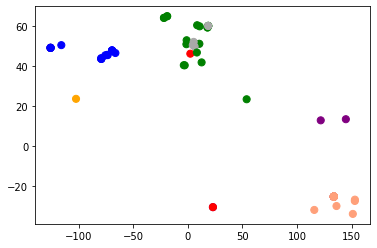

In [727]:
# location women other
df_women_other = no_us_women.loc[:,['rank','latitude','longitude']]

X_w_other = scale(df_women_other)


num_clusters = 7


color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=3)

clustering.fit(X_w_other)



df_women_other['cluster_label'] = kmeans.fit_predict(df_women_other[df_women_other.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_other[df_women_other.columns[1:3]]) # Labels of each point

df_women_other.head(10)



plt.scatter(x=df_women_other['longitude'],y=df_women_other['latitude'],c=color_theme[clustering.labels_],s=50)

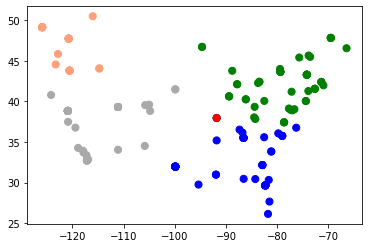

In [715]:
# location women us
mask = (df_women['longitude'] >= -135) & (df_women['longitude'] <= -60) & (df_women['latitude'] >= 25) & (df_women['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)

l = df_women.loc[mask]

df_women_us=l.loc[:,['rank','latitude','longitude']]

X_w_us = scale(df_women_us)



num_clusters = 5



color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=5)

clustering.fit(X_w_us)



df_women_us['cluster_label'] = kmeans.fit_predict(df_women_us[df_women_us.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_us[df_women_us.columns[1:3]]) # Labels of each point

df_women_us.head(10)



plt.scatter(x=df_women_us['longitude'],y=df_women_us['latitude'],c=color_theme[clustering.labels_],s=50)

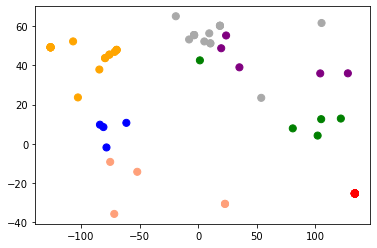

In [717]:
# location men other
df_men_other = no_us.loc[:,['rank','latitude','longitude']]

X_m_other = scale(df_men_other)


num_clusters = 7


color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=3)

clustering.fit(X_m_other)



df_men_other['cluster_label'] = kmeans.fit_predict(df_men_other[df_men_other.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_men_other[df_men_other.columns[1:3]]) # Labels of each point

df_men_other.head(10)



plt.scatter(x=df_men_other['longitude'],y=df_men_other['latitude'],c=color_theme[clustering.labels_],s=50)

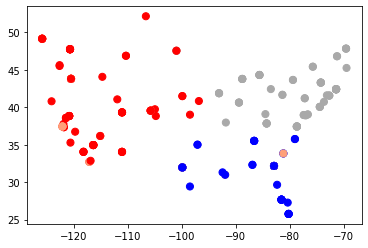

In [716]:
# location men us
mask = (df_men['longitude'] >= -135) & (df_men['longitude'] <= -60) & (df_men['latitude'] >= 25) & (df_men['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)
l = df_men.loc[mask]
df_men_us=l.loc[:,['rank','latitude','longitude']]
X_m_us = scale(df_men_us)



num_clusters = 4



color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])
clustering = KMeans(n_clusters=num_clusters, random_state=5)
clustering.fit(X_m_us)



df_men_us['cluster_label'] = kmeans.fit_predict(df_men_us[df_men_us.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_men_us[df_men_us.columns[1:3]]) # Labels of each point
df_men_us.head(10)



plt.scatter(x=df_men_us['longitude'],y=df_men_us['latitude'],c=color_theme[clustering.labels_],s=50)

In [667]:
# All men clustering setups
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X_m)
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

Text(0.5, 1.0, 'K-Means Classification Pullups')

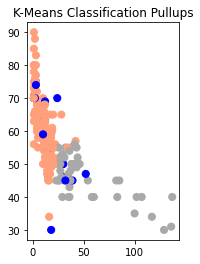

In [668]:
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,2)
plt.scatter(x=df_men['rank'],y=df_men['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

Text(0.5, 1.0, 'K-Means Classification Location')

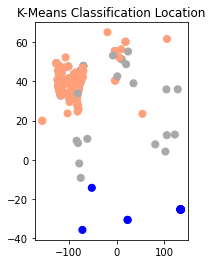

In [669]:
plt.subplot(1,2,2)
plt.scatter(x=df['longitude'],y=df['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Run5k')

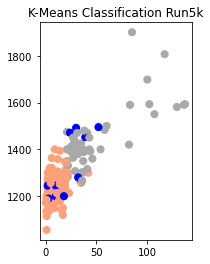

In [670]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

In [676]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

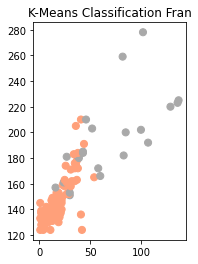

In [677]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

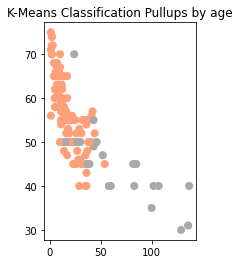

In [678]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

Text(0.5, 1.0, 'K-Means Classification Location')

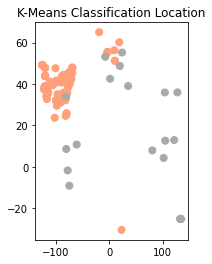

In [679]:
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

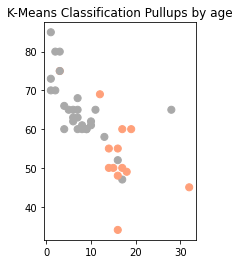

In [680]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Supervised